In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
hotel = pd.read_csv('gdrive/My Drive/Colab Notebooks/hotel_bookings.csv')

In [4]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Data preprocessing

In [6]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
replacement_data = {"children": 0.0,"country": "Unknown", "agent": 0, "company": 0}
hotel_data = hotel.fillna(replacement_data)

In [8]:
hotel_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [9]:
hotel_data['meal'].replace('Undefined', 'SC', inplace=True)

## Dropping data from the dataset when there are no visitors

In [10]:
hotel_data_zero_index = hotel_data[hotel_data['adults']+hotel_data['children']+hotel_data['babies']==0].index

In [11]:
hotel_data.drop(index = hotel_data_zero_index, inplace = True)

In [12]:
hotel_data[hotel_data['adults']+hotel_data['children']+hotel_data['babies']==0].index

Int64Index([], dtype='int64')

## Data analysis

In [13]:
count_row = hotel_data.shape[0]  # Gives number of rows
count_col = hotel_data.shape[1]  # Gives number of columns

In [14]:
print(count_row, ' - number of rows')
print(count_col, ' - number of columns')

119210  - number of rows
32  - number of columns


In [15]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [16]:
hotel_data.shape

(119210, 32)

## Task 1
Which country does the most guests come from (according to both hotels as a whole)?

Answer with the name of the country, also as shown in the data.

In [17]:
hotel_data[hotel_data["is_canceled"] == 0]["country"].value_counts()

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: country, Length: 166, dtype: int64

## Task 2
What is the price per night at each of the hotels?

The answer must be given regardless of the type of room, meals included. Also note that we only count adults and children, infants should be excluded from the calculation.

The answer must be given in one line format: Resort Hotel: 00.00, City Hotel: 00.00
- the price must be given to the nearest two decimal places
- subdivision into fractions may be with a period or comma
- hotel names in this format, colon and comma are necessary for automatic calculation of the answer 

In [18]:
resort_hotel = hotel_data[(hotel_data['hotel'] == 'Resort Hotel') & (hotel_data['is_canceled'] == 0)]
city_hotel = hotel_data[(hotel_data['hotel'] == 'City Hotel') & (hotel_data['is_canceled'] == 0)]

In [19]:
resort_hotel['adr_per_person'] = resort_hotel['adr']/(resort_hotel['adults']+resort_hotel['children'])
city_hotel['adr_per_person'] = city_hotel['adr']/(city_hotel['adults']+city_hotel['children'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
print("""Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(resort_hotel['adr_per_person'].mean(), city_hotel['adr_per_person'].mean()))

Resort hotel: 47.49 € per night and person.
City hotel: 59.27 € per night and person.


## Task 3
Which season do these two hotels have the least number of visitors?

You must give a textual answer to the example (beginning with a lowercase letter): spring, winter, summer, or fall

In [21]:
resort_hotel_guest_data = resort_hotel.groupby('arrival_date_month')['hotel'].count()
resort_hotel_guest_data

arrival_date_month
April        2550
August       3257
December     2014
February     2308
January      1866
July         3137
June         2037
March        2571
May          2535
November     1975
October      2575
September    2102
Name: hotel, dtype: int64

In [22]:
resort_guest_monthly = pd.DataFrame({'month': list(resort_hotel_guest_data.index),
                    'hotel': "Resort Hotel", 
                    'guests': list(resort_hotel_guest_data.values)})

In [23]:
city_hotel_guest_data = city_hotel.groupby('arrival_date_month')['hotel'].count()
city_hotel_guest_data

arrival_date_month
April        4010
August       5367
December     2377
February     3051
January      2249
July         4770
June         4358
March        4049
May          4568
November     2676
October      4326
September    4283
Name: hotel, dtype: int64

In [24]:
city_guest_monthly = pd.DataFrame({'month': list(city_hotel_guest_data.index),
                    'hotel': "City Hotel", 
                    'guests': list(city_hotel_guest_data.values)})

In [25]:
hotel_data_full = pd.concat([resort_guest_monthly,city_guest_monthly], ignore_index=True)

In [26]:
print(hotel_data_full)

        month         hotel  guests
0       April  Resort Hotel    2550
1      August  Resort Hotel    3257
2    December  Resort Hotel    2014
3    February  Resort Hotel    2308
4     January  Resort Hotel    1866
5        July  Resort Hotel    3137
6        June  Resort Hotel    2037
7       March  Resort Hotel    2571
8         May  Resort Hotel    2535
9    November  Resort Hotel    1975
10    October  Resort Hotel    2575
11  September  Resort Hotel    2102
12      April    City Hotel    4010
13     August    City Hotel    5367
14   December    City Hotel    2377
15   February    City Hotel    3051
16    January    City Hotel    2249
17       July    City Hotel    4770
18       June    City Hotel    4358
19      March    City Hotel    4049
20        May    City Hotel    4568
21   November    City Hotel    2676
22    October    City Hotel    4326
23  September    City Hotel    4283


## Order of months

In [27]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

In [28]:
hotel_data_full['month'] = pd.Categorical(hotel_data_full['month'], categories=months, ordered=True)

In [29]:
print (hotel_data_full['month'])

0         April
1        August
2      December
3      February
4       January
5          July
6          June
7         March
8           May
9      November
10      October
11    September
12        April
13       August
14     December
15     February
16      January
17         July
18         June
19        March
20          May
21     November
22      October
23    September
Name: month, dtype: category
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' <
                          'November' < 'December']


## The dataframe has data for July and August for the last 3 years, in other cases for 2 years. The data needs to be normalized.

In [30]:
hotel_data_full.loc[(hotel_data_full['month'] == 'July') | (hotel_data_full['month'] == 'August'),'guests'] /= 3
hotel_data_full.loc[~((hotel_data_full["month"] == 'July') | (hotel_data_full['month'] == 'August')),'guests'] /= 2

In [31]:
sns.set(rc={'figure.figsize':(15.7,8.27)})

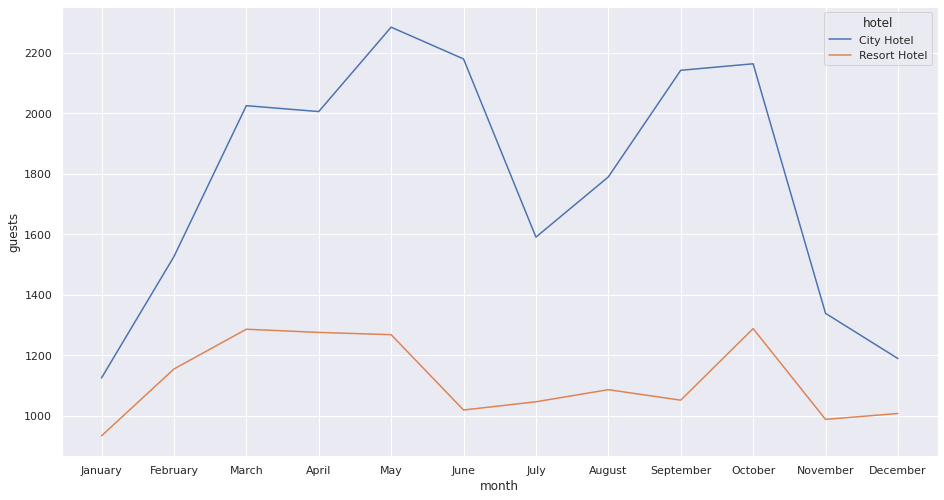

In [32]:
sns.lineplot(x = "month", y="guests", hue="hotel", data=hotel_data_full, 
             hue_order = ["City Hotel", "Resort Hotel"]);

## Task 4
How many nights maximum do visitors stay at the Resort Hotel?
How many nights maximum do visitors stay at the City Hotel?

In [33]:
resort_hotel["total_nights"] = resort_hotel["stays_in_weekend_nights"] + resort_hotel["stays_in_week_nights"]
city_hotel["total_nights"] = city_hotel["stays_in_weekend_nights"] + city_hotel["stays_in_week_nights"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
resort_hotel["total_nights"].max()

69

In [35]:
city_hotel["total_nights"].max()

48

## Task 5
What percentage of bookings occur online? (Online TA).

The answer should be given to the nearest one digit.

In [36]:
hotel_data['market_segment'].value_counts(normalize=True)*100

Online TA        47.318178
Offline TA/TO    20.285211
Groups           16.601795
Direct           10.554484
Corporate         4.430836
Complementary     0.610687
Aviation          0.197131
Undefined         0.001678
Name: market_segment, dtype: float64

## Task 6
Which percentage of reservations are cancelled at a resort hotel?

The answer must be given in whole numbers.

In [37]:
round(hotel_data[hotel_data["hotel"] == "Resort Hotel"]["is_canceled"].sum()/hotel_data[hotel_data["hotel"] == "Resort Hotel"].shape[0] * 100)

28

## Task 7
What season has the highest number of cancellations at the Resort Hotel?

You must give a textual answer: spring, winter, summer or fall

In [38]:
hotel_data[(hotel_data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum().sort_values(ascending=False)

arrival_date_month
August       1637
July         1436
April        1059
May          1024
June         1007
September    1006
October       978
February      794
March         763
December      631
November      460
January       325
Name: is_canceled, dtype: int64

## Task 8
In which month did the City Hotel have the most guests?

The name of the month in Russian with a lowercase letter

In [39]:
hotel_data_full.loc[(hotel_data_full['month'] == 'July') | (hotel_data_full['month'] == 'August'),'guests'] /= 3
hotel_data_full.loc[~((hotel_data_full["month"] == 'July') | (hotel_data_full['month'] == 'August')),'guests'] /= 2

In [40]:
sns.set(rc={'figure.figsize':(15.7,8.27)})

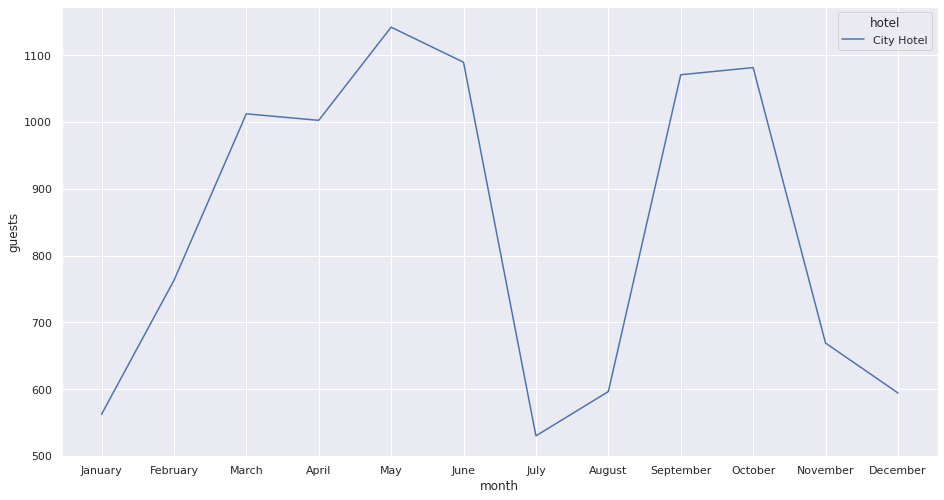

In [41]:
sns.lineplot(x = "month", y="guests", hue="hotel", data=hotel_data_full, 
             hue_order = ["City Hotel"]);

## Task 9
What percentage of all reservations with BB (Bed & Breakfast) were made at City Hotel?

The answer must be given in whole numbers.

In [42]:
hotel_data.groupby(['hotel','meal']).size()

hotel         meal
City Hotel    BB      62233
              FB         44
              HB       6412
              SC      10474
Resort Hotel  BB      30003
              FB        754
              HB       8046
              SC       1244
dtype: int64

In [43]:
round(hotel_data[hotel_data['hotel'] == 'City Hotel']['meal'].value_counts(normalize=True)*100)

BB    79.0
SC    13.0
HB     8.0
FB     0.0
Name: meal, dtype: float64